In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("housing.csv")

In [132]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15898,-122.39,37.72,52.0,135.0,34.0,93.0,26.0,2.1484,181300.0,NEAR BAY


In [133]:
df["population"].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

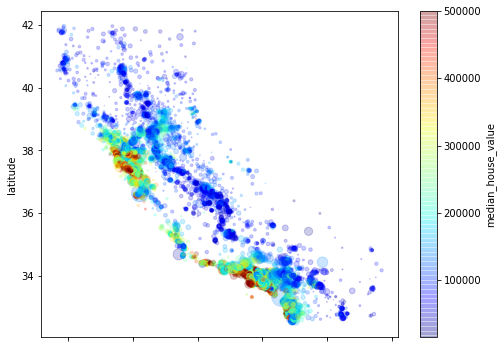

In [134]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(8, 6), s=df["population"]/100,
       c="median_house_value", cmap=plt.get_cmap("jet"), alpha=.2)

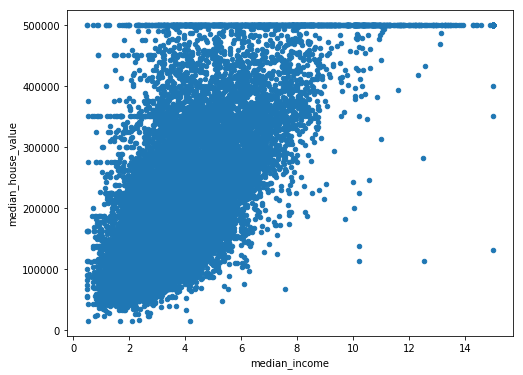

In [135]:
df.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(8,6))

Dropping all the columns with median house value 500000.


In [136]:
df = df[df["median_house_value"]<490000]

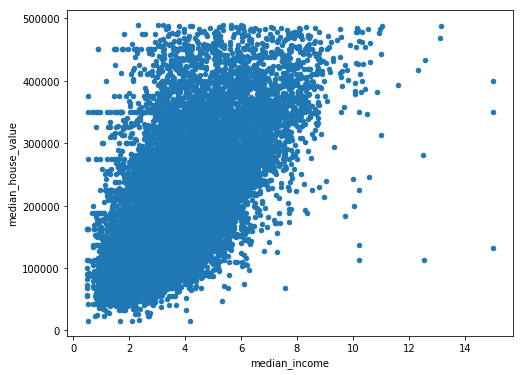

In [137]:
df.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(8,6))

In [138]:
carr = df.corr()
carr["median_house_value"].sort_values()

latitude             -0.149483
longitude            -0.046240
population            0.015378
housing_median_age    0.063295
total_bedrooms        0.076465
households            0.097021
total_rooms           0.145735
median_income         0.645032
median_house_value    1.000000
Name: median_house_value, dtype: float64

Since median_income has a direct impact on the median_house_value, let's categorize it well 

In [139]:
df["cat_income"] = np.ceil(df["median_income"]/1.5) 

In [140]:
df["cat_income"].where(df["cat_income"]<5, 5, inplace=True)

In [141]:
df["cat_income"].value_counts()

3.0    7083
2.0    6546
4.0    3487
5.0    1679
1.0     813
Name: cat_income, dtype: int64

In [142]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat_income
4629,-118.3,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN,2.0


In [143]:
df.drop(["longitude", "latitude"], axis=1, inplace=True)

In [144]:
df.sample()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat_income
19206,29.0,1706.0,415.0,990.0,394.0,1.9932,164800.0,<1H OCEAN,2.0


In [145]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median, inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19608 entries, 0 to 20639
Data columns (total 9 columns):
housing_median_age    19608 non-null float64
total_rooms           19608 non-null float64
total_bedrooms        19608 non-null object
population            19608 non-null float64
households            19608 non-null float64
median_income         19608 non-null float64
median_house_value    19608 non-null float64
ocean_proximity       19608 non-null object
cat_income            19608 non-null float64
dtypes: float64(7), object(2)
memory usage: 1.5+ MB


In [147]:
df["rooms_per_house"] = df["total_rooms"]/df["households"]
df["population_per_household"] = df["population"]/df["households"]

In [148]:
df.sample()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
15031,36.0,2211.0,384,868.0,329.0,4.0491,147900.0,<1H OCEAN,3.0,6.720365,2.638298


In [149]:
df.drop(["total_rooms", "total_bedrooms", "households"], axis=1, inplace=True)

In [150]:
df.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
10512,4.0,1176.0,3.4455,325000.0,<1H OCEAN,3.0,4.434783,2.434783


In [151]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)


In [152]:
for train_index, test_index in split.split(df, df["cat_income"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
strat_train_set.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
17029,46.0,351.0,5.3264,258100.0,NEAR OCEAN,4.0,4.941176,2.580882


In [155]:
strat_train_set["cat_income"].value_counts()/strat_train_set.shape[0]

3.0    0.348017
2.0    0.309703
4.0    0.171044
5.0    0.081793
1.0    0.038506
Name: cat_income, dtype: float64

In [156]:
strat_test_set["cat_income"].value_counts()/strat_test_set.shape[0]

3.0    0.335798
2.0    0.318205
4.0    0.170066
5.0    0.081591
1.0    0.039521
Name: cat_income, dtype: float64

In [157]:
strat_test_set.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
6832,52.0,980.0,5.3032,245700.0,<1H OCEAN,4.0,5.095745,3.475177


In [158]:
strat_test_set.drop(["cat_income"], axis=1, inplace=True)
strat_train_set.drop(["cat_income"], axis=1, inplace=True)

In [159]:
strat_train_set.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_house,population_per_household
15721,52.0,1392.0,4.0,355300.0,NEAR BAY,4.647059,2.408304


In [160]:
strat_train_set=pd.get_dummies(strat_train_set, prefix="ocean_proximity", drop_first=True)
strat_test_set=pd.get_dummies(strat_test_set, prefix="ocean_proximity", drop_first=True)

In [161]:
strat_train_set.sample()


,housing_median_age,population,median_income,median_house_value,rooms_per_house,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19096,16.0,1247.0,4.8603,198400.0,6.790155,3.23057,0,0,0,0


In [162]:
strat_test_set.sample()

,housing_median_age,population,median_income,median_house_value,rooms_per_house,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12192,17.0,4776.0,2.2423,132600.0,5.800457,2.730703,0,0,0,0


In [164]:
y_train = strat_train_set.iloc[:, 3].values
y_test = strat_test_set.iloc[:, 3].values

In [168]:
np.count_nonzero(y_test)

3922

In [169]:
len(y_test)

3922

In [170]:
strat_test_set.drop(["median_house_value"], axis=1, inplace=True)
strat_train_set.drop(["median_house_value"], axis=1, inplace=True)

In [171]:
strat_train_set.sample()

,housing_median_age,population,median_income,rooms_per_house,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7787,37.0,882.0,4.4167,4.919492,3.737288,0,0,0,0


In [172]:
x_train = strat_train_set.iloc[:,:].values
x_test = strat_test_set.iloc[:,:].values

In [175]:
np.isnan

15686

In [173]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').